# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.285739e+01     1.667954e+01
 * time: 0.0034770965576171875
     1     6.299039e+01     9.748971e+00
 * time: 0.10384511947631836
     2     5.715111e+01     1.301861e+01
 * time: 0.11992692947387695
     3     4.089526e+01     9.728631e+00
 * time: 0.14184093475341797
     4     3.019558e+01     9.657457e+00
 * time: 0.16412615776062012
     5     2.359395e+01     6.966012e+00
 * time: 0.18366312980651855
     6     1.068740e+01     2.826792e+00
 * time: 0.2034299373626709
     7     8.103873e+00     3.019331e+00
 * time: 0.21945405006408691
     8     6.461282e+00     2.492554e+00
 * time: 0.23595094680786133
     9     5.920398e+00     8.315360e-01
 * time: 0.3139519691467285
    10     5.687563e+00     8.970906e-01
 * time: 0.32732510566711426
    11     5.472430e+00     8.645781e-01
 * time: 0.340731143951416
    12     5.391945e+00     6.027043e-01
 * time: 0.354140043258667
    13     5.312453e+00     7.620692e-01
 * time: 0.3

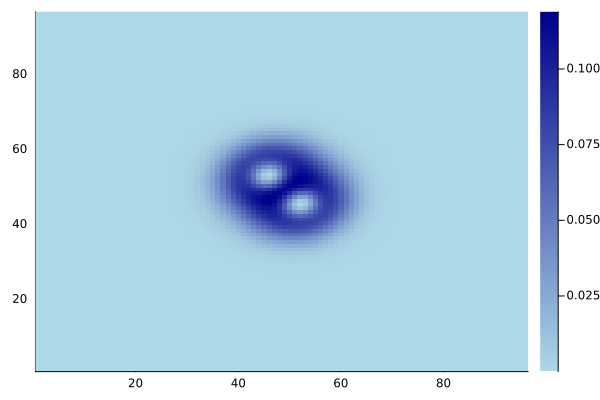

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)